In [1]:
import numpy as np
import matplotlib.pyplot as plt

## GD with momentum

In [75]:
def GD_mom(start, grad, e, rate, b):
  er_x = []
  er_y = []
  c = [start]
  iter = 0
  x1 = start
  x2 = x1 - rate*b*grad(x1)
  mom = np.array([0, 0])

  while abs(x2[0] - x1[0]) > e and abs(x2[1] - x1[1]) > e:
    x1 = x2
    mom = b * mom - rate*grad(x2)
    x2 = x1 + mom
    c.append(x2)
    iter += 1
    er_x.append(x2[0]-x1[0])
    er_y.append(x2[1]-x1[1])

  return (x2, np.array(c), iter, er_x, er_y)

## Adam

In [76]:
def adam(start, grad, rate, b1, b2, e=10**(-6)):
  c = [start]
  er_x = []
  er_y = []
  iter = 0
  x1 = start
  x2 = start
  num_stub = 10**(-8)
  s = 0
  r = 0

  while iter<5 or (abs(x2[0] - x1[0]) > e and abs(x2[1] - x1[1]) > e):

    x1 = x2
    g = grad(x1)
    iter += 1
    s = b1*s + (1 - b1) * g
    r = b2*r + (1 - b2) * g**2

    cor_s = s / (1 - b1**iter)
    cor_r = r / (1 - b2**iter)

    delta_x = -rate * cor_s / (np.sqrt(cor_r) + num_stub)
    x2 = x2 + delta_x

    c.append(x2)
    er_x.append(x2[0]-x1[0])
    er_y.append(x2[1]-x1[1])

  return (x2, np.array(c), iter, er_x, er_y)

# Анализ функции

In [105]:
def f(x):
    return x[0]**2 + x[1]**2 + np.sin(x[1])*10 + np.sin(x[0])*10 + x[0]

In [106]:
def grad(x):
    return np.array(2*x[0] + np.cos(x[0])*10 + 1, 2*x[1] + np.cos(x[1])*10)

In [78]:
x = np.arange(-15, 15, 0.1)
y = np.arange(-15, 15, 0.1)
start = np.ones(2) * 10
x, y = np.meshgrid(x, y)
z = f([x, y])

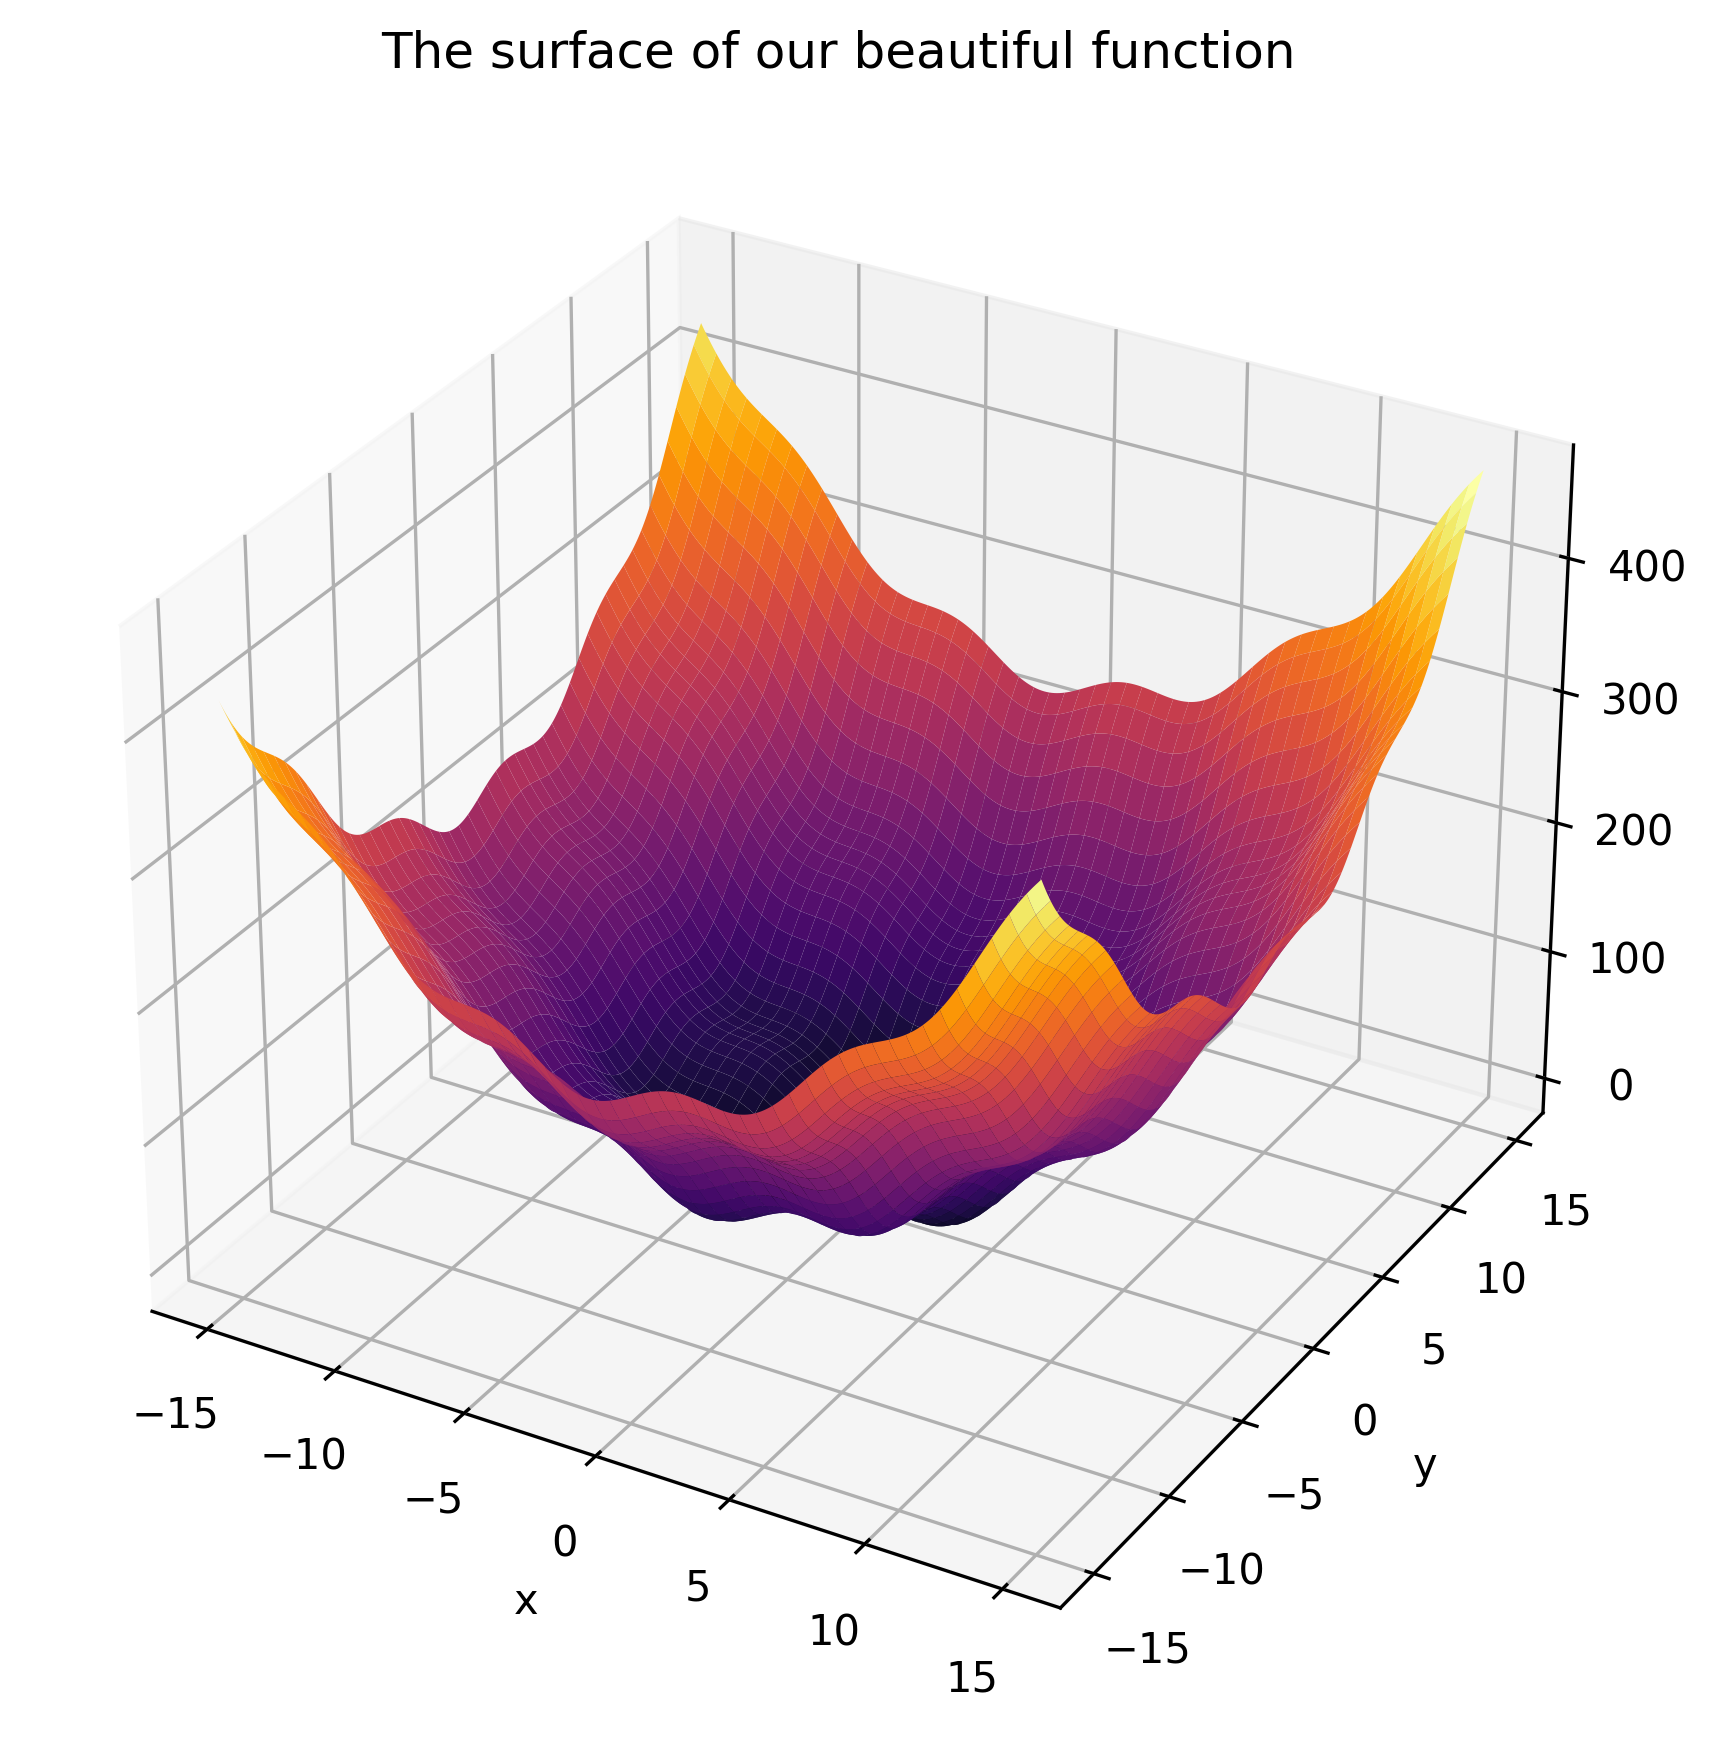

In [104]:
fig = plt.figure(figsize=(10, 7), dpi=300)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, vmin=z.min(), cmap='inferno')
plt.title("The surface of our beautiful function")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
# the function looks like a piece of blackberry

In [109]:
gd_solve = GD_mom(grad=grad, start=start, rate=0.0001, e=0.0001, b=0.8)
print(' iters:', gd_solve[2], '\n', 'f(x):', f(gd_solve[0]), '\n', 'x:', gd_solve[0][0], '\n', 'y:', gd_solve[0][1])

 iters: 1571 
 f(x): 20.45034657518734 
 x: 3.7371154979819163 
 y: 3.7371154979819163


In [110]:
adam_solve = adam(grad=grad, start=start, b1=0.8, b2=0.9, rate=0.001, e=0.0001)
print(' iters:', adam_solve[2], '\n', 'f(x):', f(adam_solve[0]), '\n', 'x:', adam_solve[0][0], '\n', 'y:', adam_solve[0][1])

 iters: 6328 
 f(x): 20.47190295153539 
 x: 3.710481283814658 
 y: 3.710481283814658


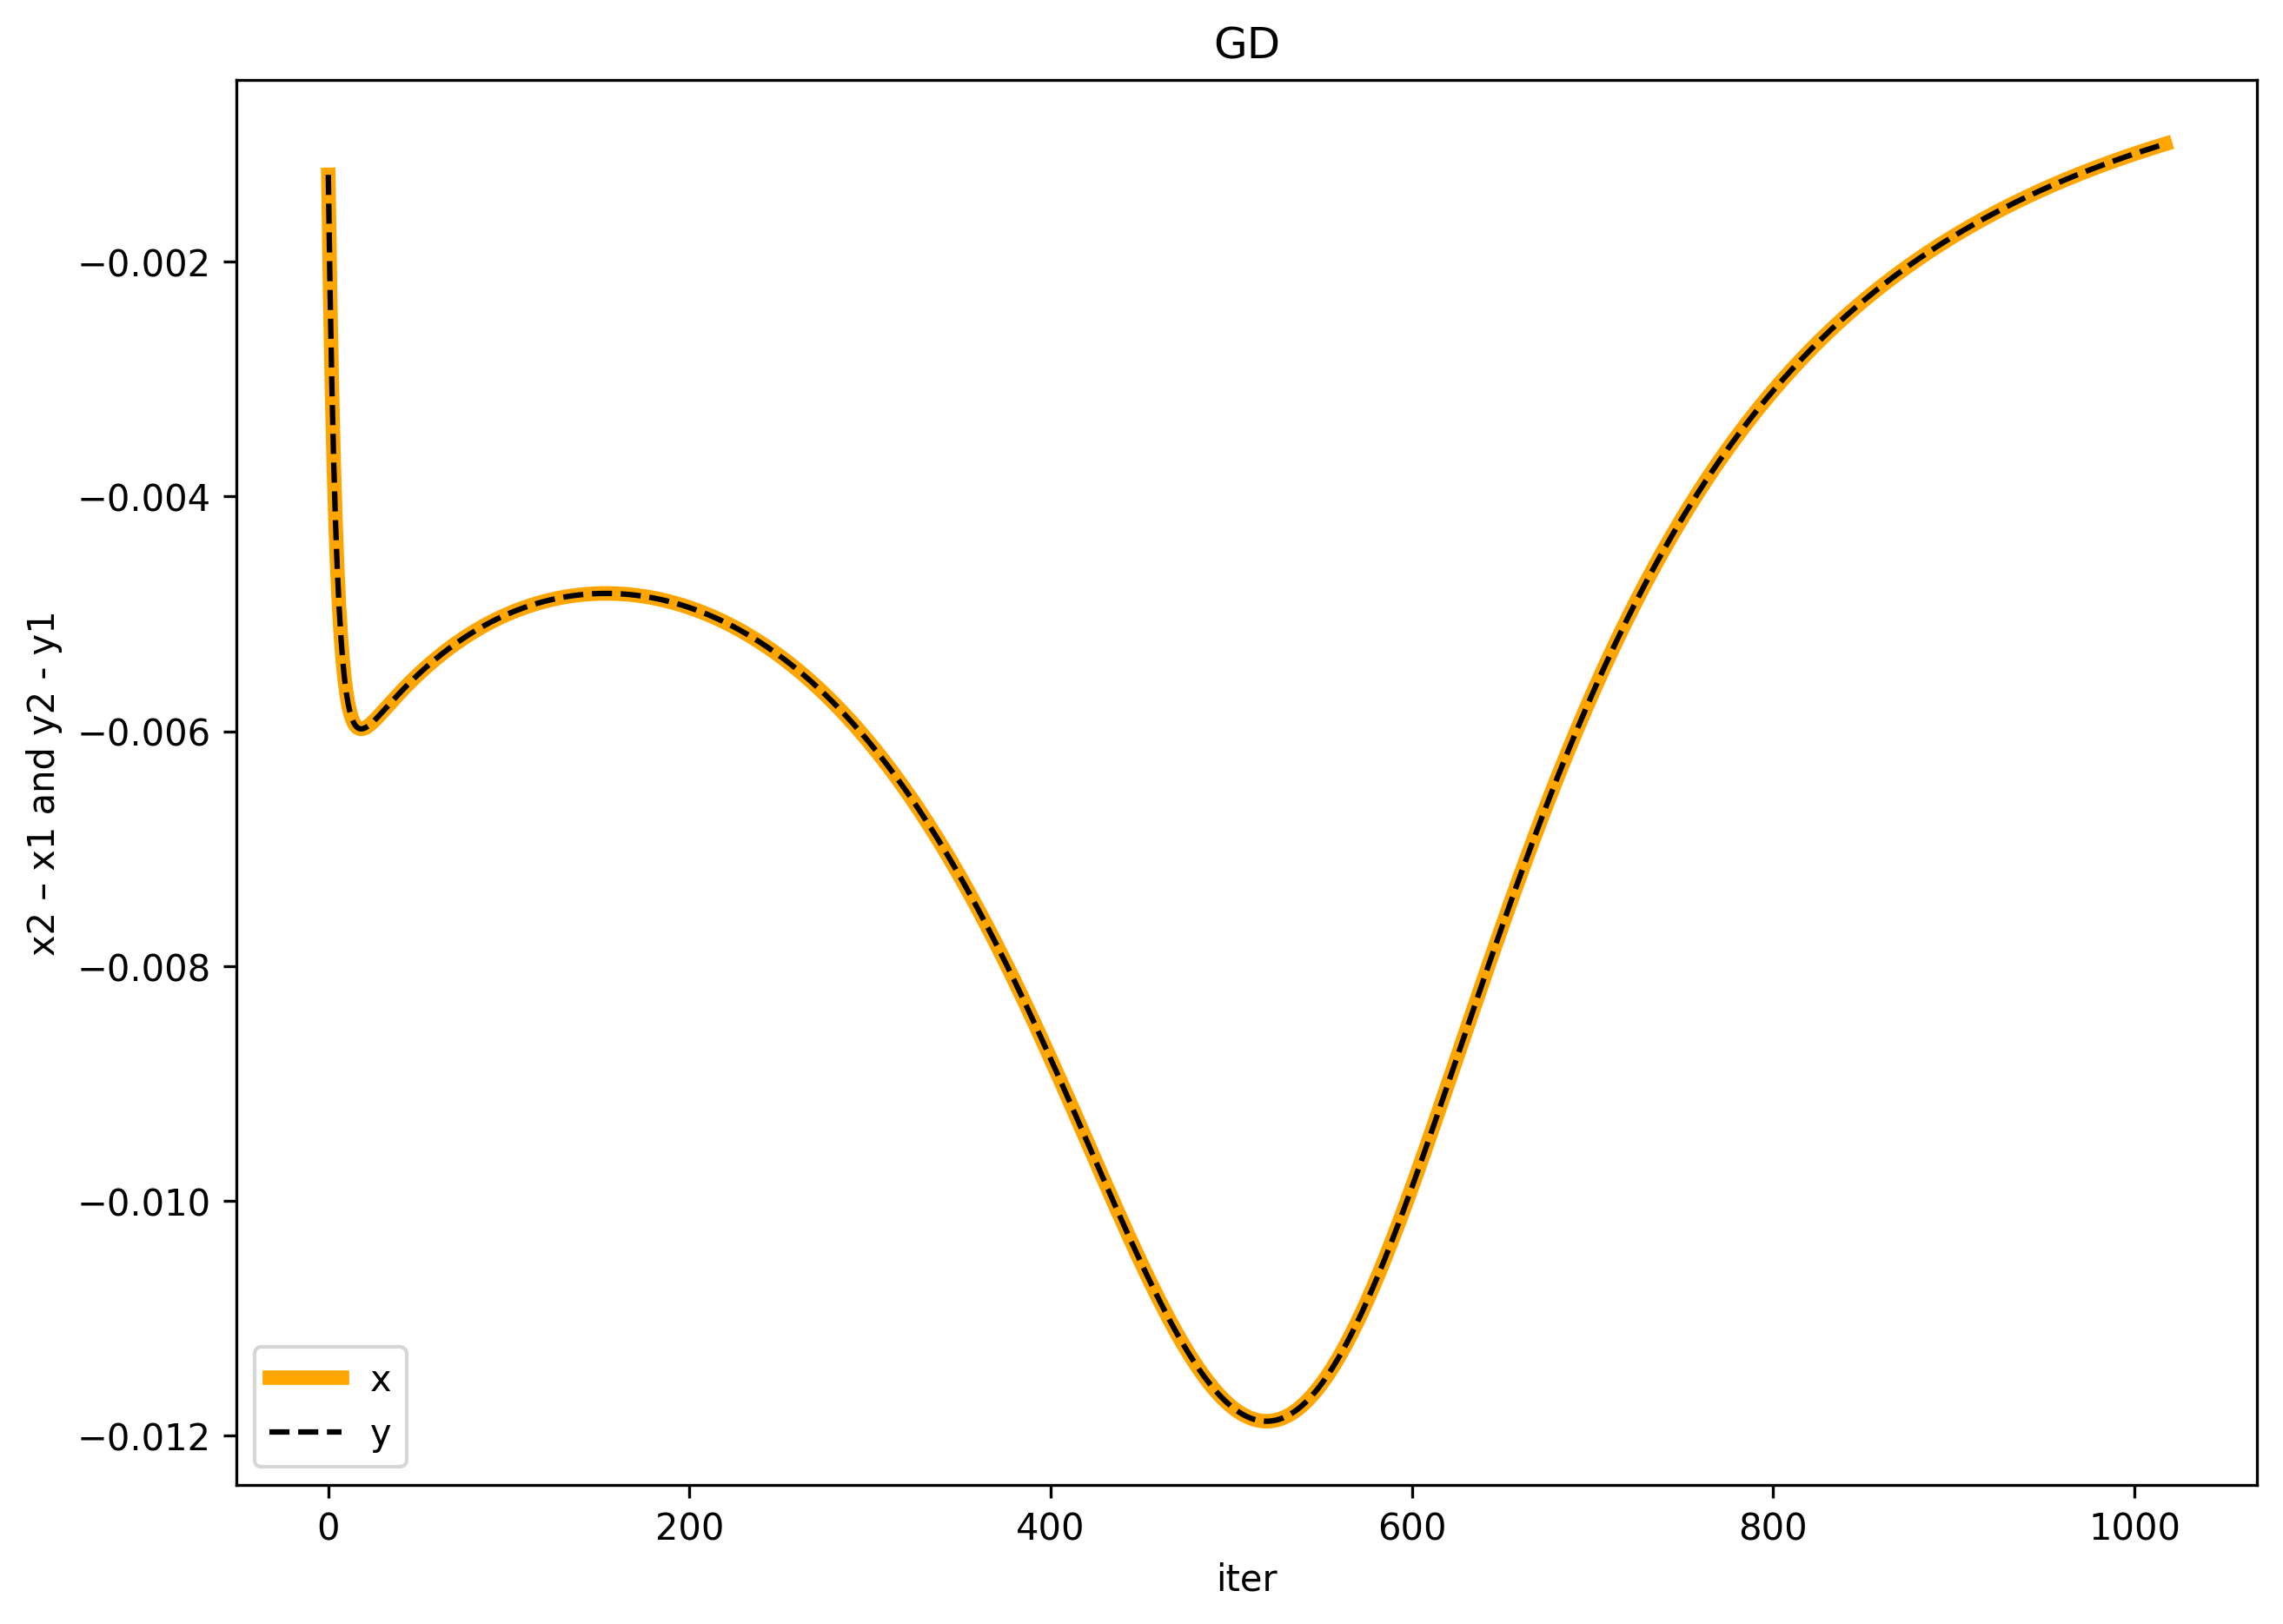

In [108]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
x_gd = np.linspace(0,gd_solve[2],gd_solve[2])
plt.plot(x_gd,gd_solve[3], color='orange', linewidth=4, label='x')
plt.plot(x_gd,gd_solve[4], color='black', linestyle='--', label='y')
plt.xlabel("iter")
plt.ylabel("x2 – x1 and y2 - y1")
plt.title("GD")
plt.legend()
plt.show()

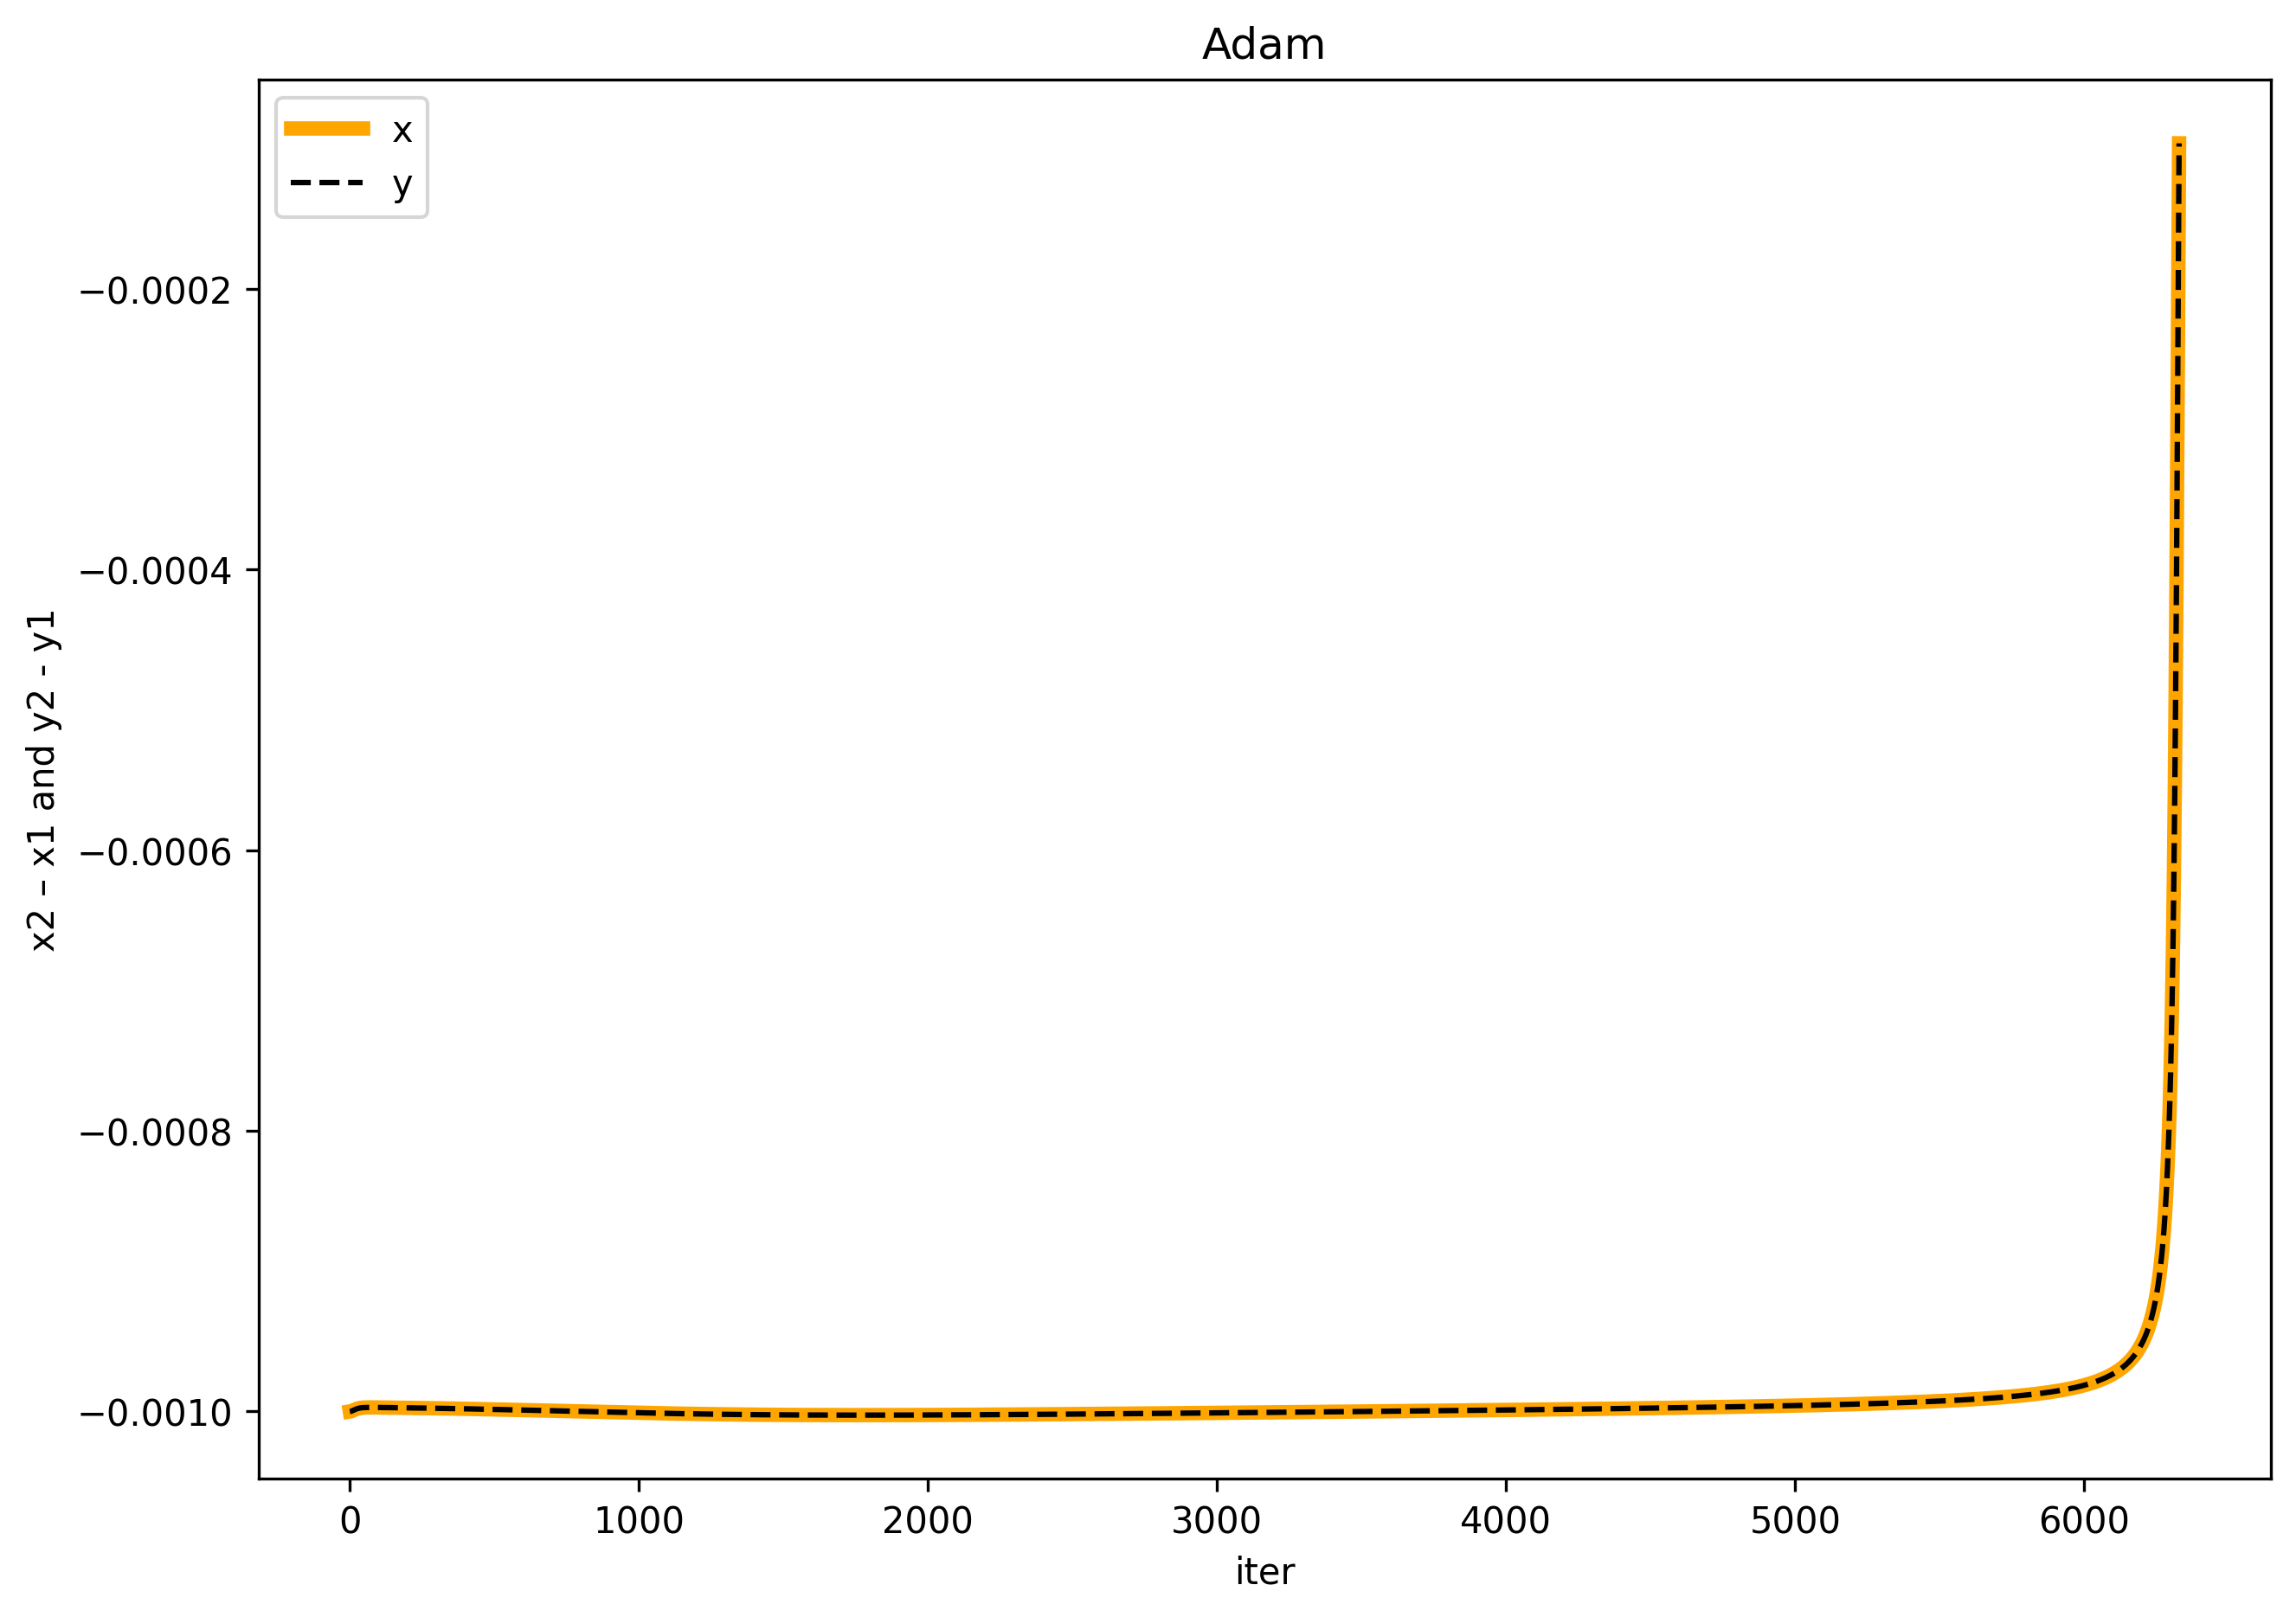

In [107]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
x_adam = np.linspace(0,adam_solve[2],adam_solve[2])
plt.plot(x_adam,adam_solve[3], color='orange', linewidth=4, label='x')
plt.plot(x_adam,adam_solve[4], color='black', linestyle='--', label='y')
plt.xlabel("iter")
plt.ylabel("x2 – x1 and y2 - y1")
plt.title("Adam")
plt.legend()
plt.show()